In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import Image
import copy
import scipy as stats
import seaborn as sns



In [6]:
###function to get file path:
def filepath(arg1='..', arg2='data', arg3='filename'):
        path = os.path.join(arg1, arg2, arg3)
        return path

##function to check the total null value:
def total_null(df):
        return df.isnull().sum()
  

# read files using function
CSV_PATH_PALM = filepath(arg3='palm_oil_production.csv')
CSV_PATH_FOREST = filepath(arg3='change_forest.csv')


In [7]:

COLS_TO_USE = ['Entity', 'Code', 
              'Year', 'Tonnes']

df_palm = pd.read_csv(CSV_PATH_PALM, usecols=COLS_TO_USE)
df_forest = pd.read_csv(CSV_PATH_FOREST)
# df_land = pd.read_csv(CSV_PATH_LAND)


In [8]:
# simplify column names of dataframe 
df_forest.rename(columns={"Annual net change in forest area": 
                        "Forest_Change"}, inplace=True)

# df_land.rename(columns={"Crops - Oil palm fruit - 254 - Area harvested - 5312 - ha": 
#                                "Palm_Land_Use"}, inplace=True)


In [9]:
#Intro image
print("Palm oil is everywhere today: " 
      "in food, soap, lipstick, even newspaper ink." 
      # Southeast Asia
       " The world uses more palm oil than any other vegetable oil in 2020.")

Image(url= "../img/palm_life.png", width=600, height=700)

Palm oil is everywhere today: in food, soap, lipstick, even newspaper ink. The world uses more palm oil than any other vegetable oil in 2020.


In [10]:

# data cleaning
# check for null values
total_null(df_palm)
total_null(df_forest)

Entity           0
Code             8
Year             0
Forest_Change    0
dtype: int64

In [11]:

# fill out null values
df1 = df_palm.fillna(value = 'NOT COUNTRY')
df2 = df_forest.fillna(value = 'NOT COUNTRY')
# df3 = df_land.fillna(value = 'NOT COUNTRY')

In [12]:


# New dataframes that contain only countries
Code = ['NOT COUNTRY', 'OWID_WRL']

indexNames1 = df1[df1['Code'].isin(Code)].index
df_palm_country = df1.drop(indexNames1)

indexNames2 = df2[df2['Code'].isin(Code)].index
df_forest_country = df2.drop(indexNames2)

# indexNames3 = df3[df3['Code'].isin(Code)].index
# df_land_countrt = df3.drop(indexNames3)

In [13]:

## Process palm by country dataframe
# drop data before 1970 in new data frame 
df_palm_country = df_palm_country[df_palm_country['Year'] >= 1975]  

Notes:

In the next two codeblocks,  I use the mean methond to find the countried that produce palm oil above average amount.

In [14]:
# Find the countries produce the most palm oil
MEAN_PRODUCTION = df_palm_country['Tonnes'].mean()

df_palm_country_top = df_palm_country[df_palm_country['Tonnes'] 
                                        > MEAN_PRODUCTION]
Top_Production_Country = df_palm_country_top.Entity.unique() 

In [15]:
print("The following list of countries " 
    "are the top 10 producers of palm oil in the world:\n" )
print (Top_Production_Country)

The following list of countries are the top 10 producers of palm oil in the world:

['Colombia' 'Ecuador' 'Guatemala' 'Honduras' 'Indonesia' 'Malaysia'
 'Melanesia' 'Nigeria' 'Papua New Guinea' 'Thailand']


In [16]:
# PLotting the top 10 palm oil producer
# make a diction of dataframe
dict_of_df_palm = {}
for country in Top_Production_Country:
    key_name = 'df_plot_'+str(country)    
    dict_of_df_palm[key_name] = copy.deepcopy(
        df_palm_country.loc[df_palm_country['Entity']==country])
 



Notes:

I literate the data and a list of line style to create a line chart of the palm oil production trend through the years among the top countries.

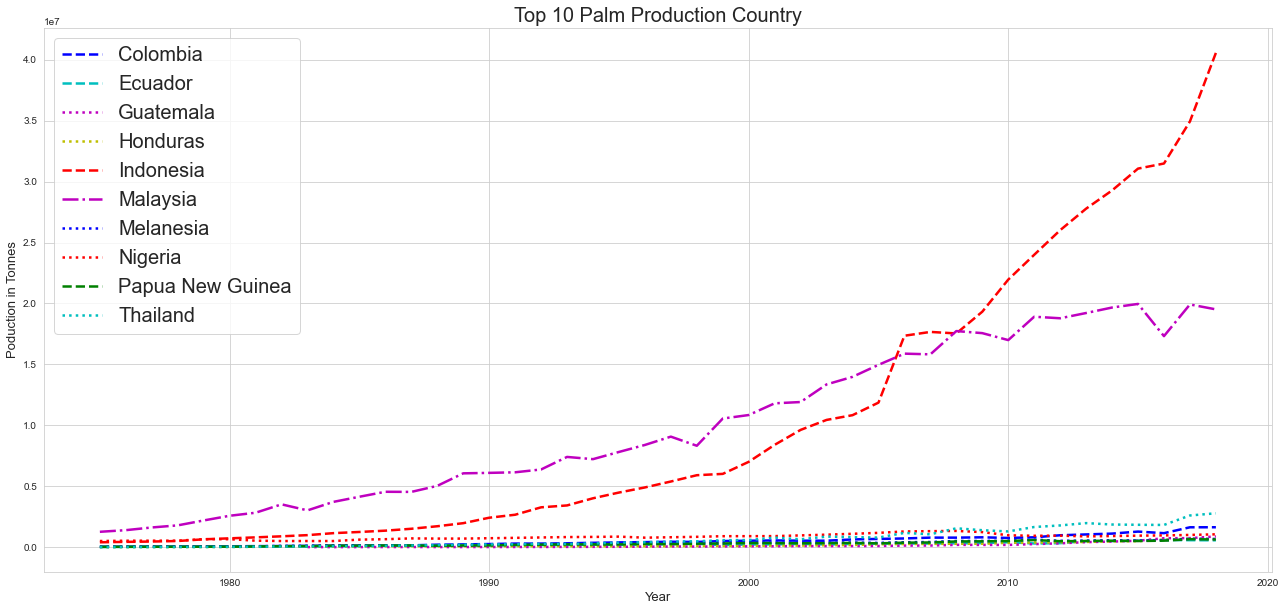

In [17]:
# iterate through the dataframe dictionary to creat the plot
ls_style = ['b--', '--c', ':m', ':y', '--r',
                 '-.m', ':b', ':r', '--g', ':c']
sns.set_style('whitegrid')
fig, axes = plt.subplots(figsize=(22,10))
axes.set_title('Top 10 Palm Production Country', fontsize = 20)
axes.set_xlabel('Year', fontsize = 13)
axes.set_ylabel('Poduction in Tonnes', fontsize = 13)
axes.set
i = 0
for df in dict_of_df_palm:
    axes.plot((dict_of_df_palm[df]['Year']),dict_of_df_palm[df]['Tonnes'] , ls_style[i], 
            label = Top_Production_Country[i], linewidth=2.5)
    i += 1
axes.legend(prop={'size': 20})

In [18]:
# conlusion from chart
print("\n\nIndonesia and Malaysia two country alone accounts for 87% of global palm oil supply\n")



Indonesia and Malaysia two country alone accounts for 87% of global palm oil supply



Notes:

Based on the line chart two countried produce more palm than other countries. Therefore I created a pie chart to show just how much these two countries produce.

In [19]:
# extract data of the two major countries
df_palm_world = df_palm.loc[df_palm['Entity']=='World']

Malaysia_2018 = (dict_of_df_palm['df_plot_Malaysia'].loc
                 [dict_of_df_palm['df_plot_Malaysia']['Year']==2018]['Tonnes']).values[0]
Indonesia_2018 = (dict_of_df_palm['df_plot_Indonesia'].loc
                  [dict_of_df_palm['df_plot_Indonesia']['Year']==2018]['Tonnes']).values[0]
World_2018 = ((df_palm_world.loc[df_palm_world['Year']==2018]['Tonnes']).values[0] 
              - Malaysia_2018 - Indonesia_2018)

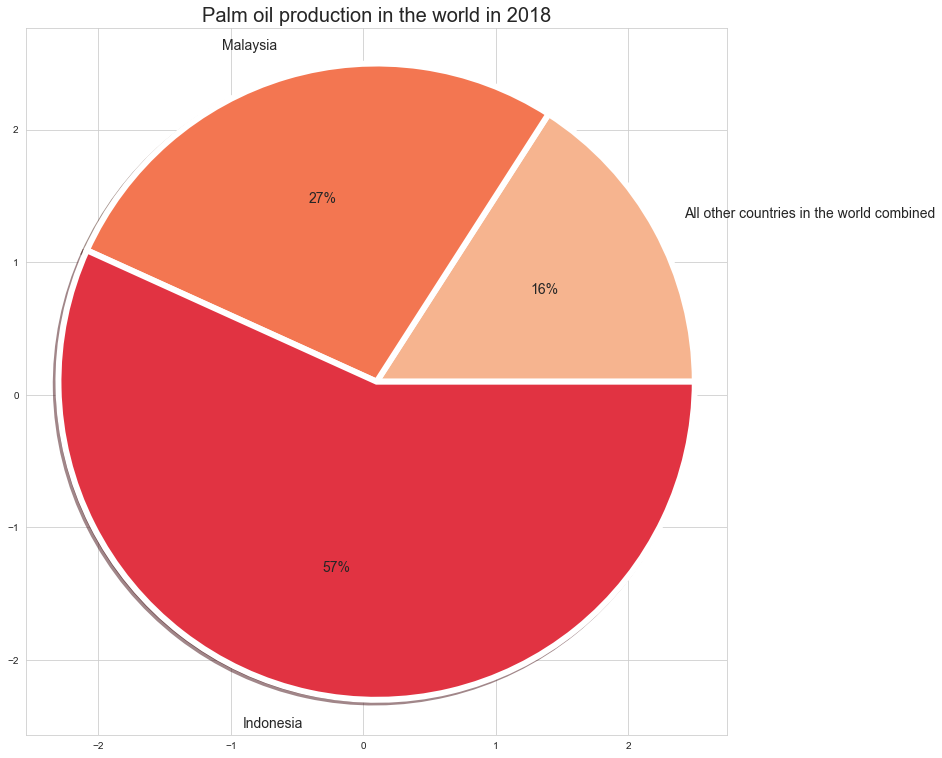

In [20]:
#define data
data = [World_2018,Malaysia_2018, Indonesia_2018]
labels = ['All other countries in the world combined','Malaysia','Indonesia']

plt.subplots(figsize=(13,13))
#define Seaborn color palette to use
colors = sns.color_palette("rocket_r")[0:5]
plt.title("Palm oil production in the world in 2018", fontsize=20)


#create pie chart
plt.pie(data, labels = labels, colors = colors, 
        autopct='%.0f%%', 
        shadow = 'True',
        #startangle = 90,
        radius = 2.4,
        textprops = {'fontsize':14},
        wedgeprops = {'linewidth': 6},
        frame = 'true' ,
        center = (0.1,0.1))

plt.show()



In [21]:
# This is to find out the biggest contributor of the world wide production


In [22]:
print("\n\nIndonesia is the world’s biggest exporter of palm oil\n")
print("In the past two decades, more than 25 million hectares of tree cover has been lost in Indonesia") 
print( "much of it logged or burned to plant oil palms.\n")
Image(url= "../img/indo.png", width=800, height=700)



Indonesia is the world’s biggest exporter of palm oil

In the past two decades, more than 25 million hectares of tree cover has been lost in Indonesia
much of it logged or burned to plant oil palms.



In [23]:
Image(url= "../img/forest.png", width=800, height=700)

In [24]:
Image(url= "../img/borneo.gif", width=700, height=500)

In [25]:
## process deforestation data
# make a list of country
ls_forest_country = ['China', 'Indonesia', 'Brazil', 
                     'Myanmar', 'Tanzania', 'Argentina', 'World']

In [26]:
dict_of_df = {}
for country in ls_forest_country:
    key_name = 'df_plot_'+str(country)    
    dict_of_df[key_name] = copy.deepcopy(
        df_forest.loc[df_forest['Entity']==country])



In [27]:
# This is to build a dictionary of data from a specific year in the dataframe

In [28]:
China_2015 = (dict_of_df['df_plot_China'].loc[dict_of_df['df_plot_China']['Year']==2015]['Forest_Change']).values[0]
Indonesia_2015 = (dict_of_df['df_plot_Indonesia'].loc[dict_of_df['df_plot_Indonesia']['Year']==2015]['Forest_Change']).values[0]
Myanmar_2015 = (dict_of_df['df_plot_Myanmar'].loc[dict_of_df['df_plot_Myanmar']['Year']==2015]['Forest_Change']).values[0]
Brazil_2015 = (dict_of_df['df_plot_Brazil'].loc[dict_of_df['df_plot_Brazil']['Year']==2015]['Forest_Change']).values[0]


China_2010 = (dict_of_df['df_plot_China'].loc[dict_of_df['df_plot_China']['Year']==2010]['Forest_Change']).values[0]
Indonesia_2010 = (dict_of_df['df_plot_Indonesia'].loc[dict_of_df['df_plot_Indonesia']['Year']==2000]['Forest_Change']).values[0]
Myanmar_2010 = (dict_of_df['df_plot_Myanmar'].loc[dict_of_df['df_plot_Myanmar']['Year']==2010]['Forest_Change']).values[0]
Brazil_2010 = (dict_of_df['df_plot_Brazil'].loc[dict_of_df['df_plot_Brazil']['Year']==2010]['Forest_Change']).values[0]



China_2000 = (dict_of_df['df_plot_China'].loc[dict_of_df['df_plot_China']['Year']==2000]['Forest_Change']).values[0]
Indonesia_2000 = (dict_of_df['df_plot_Indonesia'].loc[dict_of_df['df_plot_Indonesia']['Year']==2000]['Forest_Change']).values[0]
Myanmar_2000 = (dict_of_df['df_plot_Myanmar'].loc[dict_of_df['df_plot_Myanmar']['Year']==2000]['Forest_Change']).values[0]
Brazil_2000 = (dict_of_df['df_plot_Brazil'].loc[dict_of_df['df_plot_Brazil']['Year']==2000]['Forest_Change']).values[0]


China_1990 = (dict_of_df['df_plot_China'].loc[dict_of_df['df_plot_China']['Year']==1990]['Forest_Change']).values[0]
Indonesia_1990 = (dict_of_df['df_plot_Indonesia'].loc[dict_of_df['df_plot_Indonesia']['Year']==1990]['Forest_Change']).values[0]
Myanmar_1990 = (dict_of_df['df_plot_Myanmar'].loc[dict_of_df['df_plot_Myanmar']['Year']==1990]['Forest_Change']).values[0]
Brazil_1990 = (dict_of_df['df_plot_Brazil'].loc[dict_of_df['df_plot_Brazil']['Year']==1990]['Forest_Change']).values[0]



In [29]:
ls_forest={ '2015':[China_2015,Indonesia_2015,Myanmar_2015,Brazil_2015],
            '2010':[China_2010,Indonesia_2010,Myanmar_2010,Brazil_2010],
            '2000':[China_2000,Indonesia_2000, Myanmar_2000,Brazil_2000 ],
            '1990':[China_1990,Indonesia_1990, Myanmar_1990,Brazil_1990],
            }

 Notes:
 
 I make the plot of annual forest change of different countries. 
 The country picked are the coutry has major changes over the years.

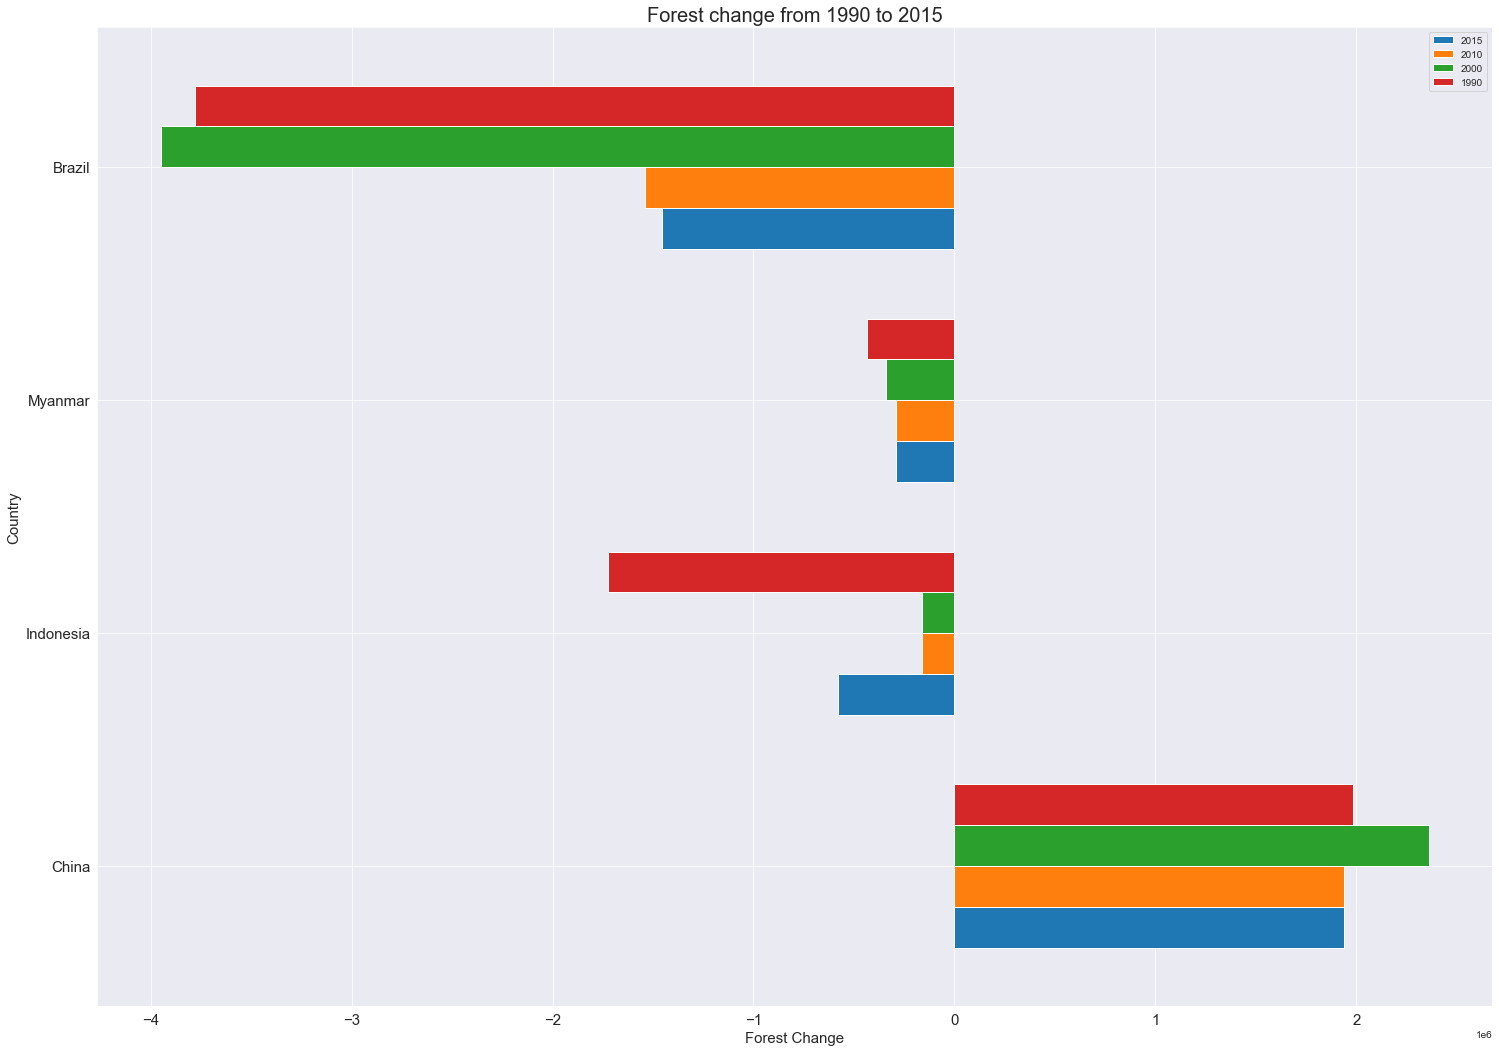

In [30]:
sns.color_palette("crest")
sns.set_style('darkgrid')

df_a = pd.DataFrame(ls_forest,columns=['2015','2010','2000','1990'], 
                    index = ['China','Indonesia','Myanmar','Brazil'])

df_a.plot.barh(fontsize=15,width = 0.7, figsize=(25,18))
plt.ylabel('Country', fontsize=15)
plt.xlabel('Forest Change in Acres', fontsize=15)
plt.title("Forest change from 1990 to 2015", fontsize=20)

plt.legend(loc = 0)
plt.show()

In [31]:
fig.savefig('bar_forest.png')

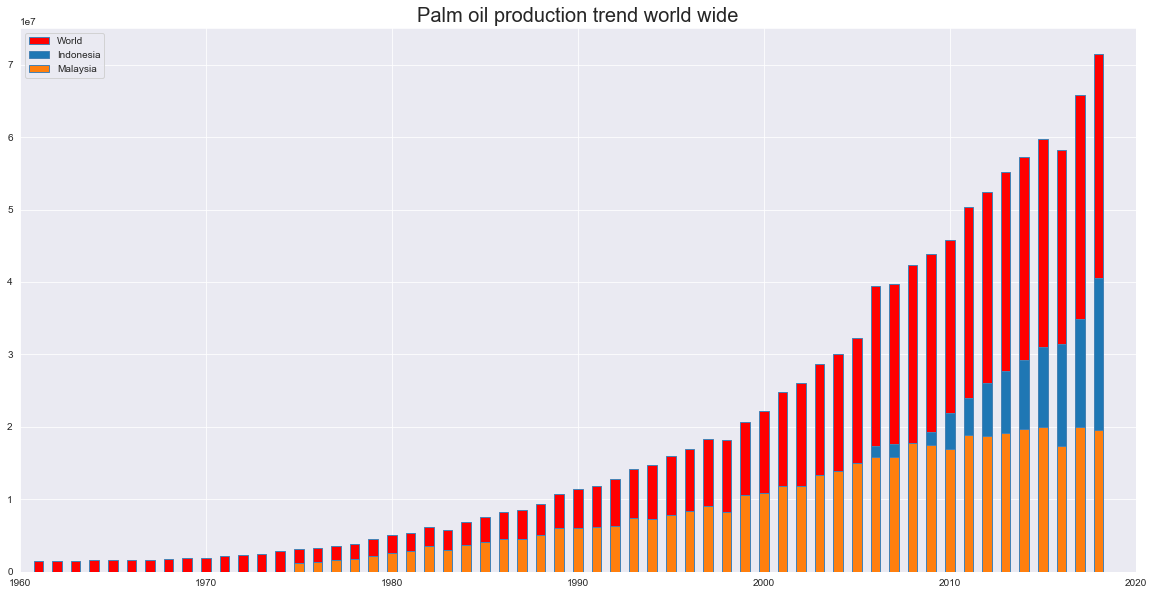

In [32]:
plt.figure(figsize=(20,10))
barWidth = 0.52
plt.title("Palm oil production trend world wide", fontsize=20)
sns.color_palette("cubehelix", as_cmap=True)
plt.bar(df_palm_world['Year'], df_palm_world['Tonnes'], width = barWidth, color='red',edgecolor='steelblue', label="World")
plt.bar(dict_of_df_palm['df_plot_Indonesia']['Year'], dict_of_df_palm['df_plot_Indonesia']['Tonnes'], width = barWidth, 
        #color='blue',
        edgecolor='steelblue', label='Indonesia')
plt.bar(dict_of_df_palm['df_plot_Malaysia']['Year'], dict_of_df_palm['df_plot_Malaysia']['Tonnes'], width = barWidth, 
        #color='green',
        edgecolor='steelblue', label ='Malaysia')
plt.xlim(xmin=1960,xmax=2020)

plt.legend(loc = 0)
plt.show()

Notes:

The analysis is that the world palm oil production has been growing substantially over the last 30 years. And the countries contribute the most are the ones from southeast asia. 

In [33]:
print("\n\nThe global production of palm oil is",
"projected to be around 78 million metric tons in the year 2023\n")



The global production of palm oil is projected to be around 78 million metric tons in the year 2023

